In [ ]:
# Tarea resuelta
## PREPARACIÓN DEL AMBIENTE DE COMPUTACIÓN

En este paso dejaremos preparado correctamente nuestro entorno de computación, el cuál será realmente 
necesario para poder hacer el análisis de nuestra proteína. Aquí lo que hacemos es lo siguiente:

1. Instalamos el BLAST en nuestro entorno de computación.
2. Descomprimimos el archivo taxdb.btd.gz.

La forma en la que haremos esto será ejecutando el bloque siguiente, sin necesidad de salir del cuaderno. 
Esto lo podemos hacer, gracias a que disponemos en este entorno de un pequeño script  de BASH ya preparado 
('preparar_ambiente.sh').

In [1]:
system2(command = './preparar_ambiente.sh', wait = TRUE)

In [ ]:
## INTRODUCCIÓN Y MÉTODOS

En este análisis, realizaremos una búsqueda y exploración en la base de datos disponible (swissprot).En este análisis
lo que pretendemos es hacernos una idea de  la distribución taxonómica de las secuencias homólogas a nuestra proteína
problema (CHRM1), que será nuestra query en la búsqueda. Esta proteína es conocida por ser uno de los 2 tipos princi-
pales de receptores de acetilcolina en las neuronas de vertebrados, concretamente es un receptor muscarínico.

La manera en la que haremos  esta búsqueda será realizando una serie de blastp con distintos grados de restricción,es
decir con diferentes E valores.
*NOTA: este parámetro (E valor) lo  fijaremos nosotros según el grado de homología que nos interese. Cuanto mayor sea 
el E Valor, menor será el grado de homología necesario para el alineamiento.

## RESULTADOS
### BLASTP individual

En primer lugar, empezaremos haciendo una búsqueda en BLASTP sencilla, en la cuál solo tendremos alineamientos con
proteínas subject que presenten un valor E igual o menor de 1.0e-50 (es muy exigente). Este valor lo fijamos noso-
tros.

In [2]:
#Como podemos observar, entre los argumentos especificamos el formato de salida ,"-outfmt".
#También podemos ver, entre los argumentos, como la base de datos en la que hacemos la búsqueda es swissprot.
#Otra de las cosas que podemos ver es como especificamos la query,que será el archivo que presenta la secuencia de nuestro receptor muscarínico.
#Por último, destacar el E valor fijado (1.0e-50) y una serie de parámetros que nosotros especificamos (longitud, taxón, porcentaje de identidad en el alineamiento.....)


BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-50',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

#El resultado del comando anterior es un montón de texto plano. Para facilitar su interpretación lo que haremos será presentarlo en forma de tabla
#Esto lo haremos aplicando las funciones textConnection() y read.table(). De esta manera lo transformamos en un data frame, donde cada una de las columnas es una variable.
# La opción "col.names" sirve para poner nombres a cada una de las columnas de la tabla.

TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
#Ejecutando el siguiente comando obtenemos las dimensiones de la tabla resultante de nuestro blastp.
dim(TablaOut01)

[1] 37 11

In [3]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


In [ ]:
La tabla de resultados incluye 37 secuencias encontradas, incluyendo la misma secuencia usada como *query*. Las columnas de la tabla son las siguientes:

- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.

In [ ]:
### BLASTP en serie

Para ver cómo aumenta el número de secuencias a medida que aumenta el umbral de valor E fijado deberíamos repetir
la búsqueda unas cuantas veces, con valores del parámetro `-evalue` diferentes. Esto podemos hacerlo de forma
individual, de la misma manera que hemos procedido antes, o de forma simultánea en una búsqueda de BLASTP en serie.

La manera en la que haremos esto será la siguiente:
1. En primer lugar, definimos un vector con una serie de valores E máximos, que irán de E valores muy restrictivos (menores)
a valores menos restrictivos(mayores). Este vector lo nombramos como `Valores_E_maximos`.
2. Una vez creado nuestro vector aplicamos la función  lapply, que ejecutará  una búsqueda blastp para cada uno de
los E valores del vector creado previamente. El resultado de esta búsqueda en serie será una serie de tablas.


In [4]:
#Primero creamos el vector Valores_E_maximos con los distintos E valores de cada una de las búsquedas
Valores_E_maximos <- c('1.0e-50', '1.0e-40', '1.0e-30', '1.0e-20', '1.0e-10',
                       '1.0e-08', '1.0e-06', '1.0e-04', '1.0e-02', '1')

#La función Lapply sirve para aplicar un BLAST a cada uno de los E valores especificados en el vector Valores_E_maximos
#La función que aplicamos, definida entre llaves{}, nos sirve para obtener una tabla de resultados (igual que en la búsqueda individual).

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [ ]:
El objeto `Lista_de_Tablas` guarda las tablas de resultados de los diez **blastp** ejecutados. Podemos acceder a 
una tabla individual mediante los dobles corchetes:

In [5]:
tail(Lista_de_Tablas[[3]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
89,Q09388.3,36.323,223,34,241,14,236,2.66e-37,6239,Caenorhabditis elegans,nematodes
90,Q60476.1,26.699,412,34,433,56,445,1.07e-34,10141,Cavia porcellus,rodents
91,Q588Y6.1,33.761,234,3,235,26,247,1.10e-32,9685,Felis catus,carnivores
92,Q25322.1,30.085,236,23,258,49,271,1.07e-31,7004,Locusta migratoria,grasshoppers
93,Q25321.1,30.085,236,23,258,49,271,1.12e-31,7004,Locusta migratoria,grasshoppers
94,P35404.1,33.645,214,22,235,46,246,6.95e-31,9267,Didelphis virginiana,marsupials


In [ ]:
Para ver el número de secuencias homólogas que se han encontrado en cada una de las búsquedas del BLASTP en serie
lo que hacemos es aplicar la funcion `dim()` que devuelve las dimensiones del objeto en cuestión (número de filas
y de columnas) y me quedo con la primera dimensión (número de filas):

In [6]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  37  53  94 249 485 577 647 682 730 774

In [ ]:
Como podemos ver, el número de secuencias alineadas aumenta cuanto mayor es el Valor E (más cercano a 1); y va desde 37 secuencias, con un valor E muy restrictivo (1e-50), hasta 
774 secuencias alineadas, con un valor mucho más permisivo (1).

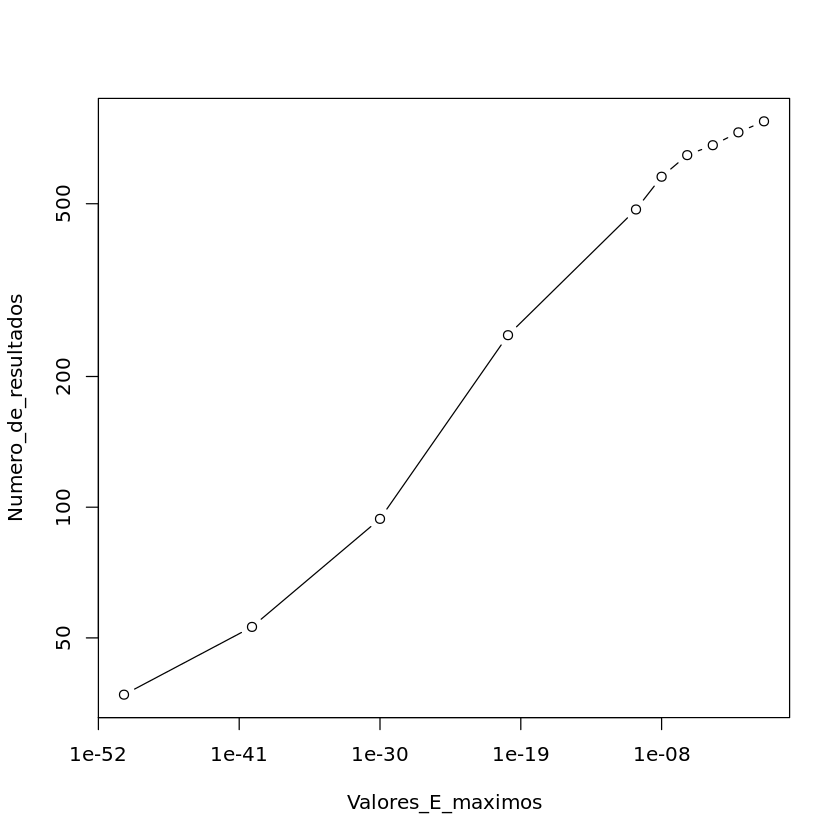

In [7]:
# En la representación gráfica, podemos usar escala logarítmica solamente
# en un eje ("log='x'"), en los dos, o en ninguno
# En este caso, usamos escala logarítmica en los 2 ejes (x e y).
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

In [ ]:
Aquí también podemos ver, aunque esta vez de forma gráfica, como el número de secuencias alineadas es mayor para Valores E más grandes (menos restrictivos).

In [ ]:
A continuación, también podemos ver la relación entre la longitud del alineamiento y el E Valor de la última bús-
queda (tabla 10), la cuál nos proporciona todo el conjunto  de alineamientos encontrado (E Valor=1).

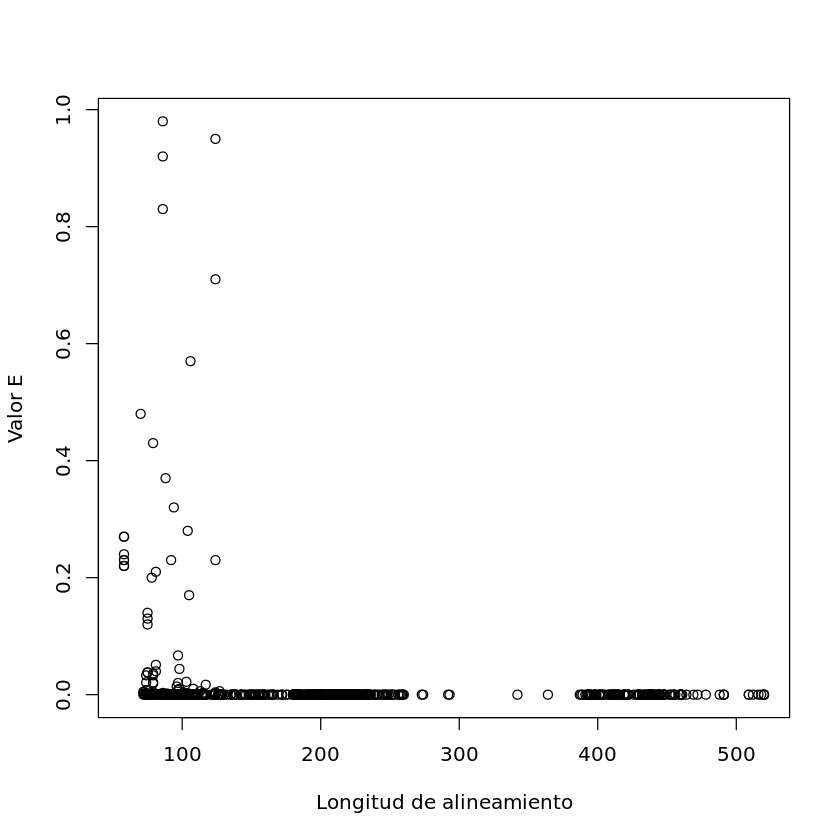

In [8]:
#El símbolo "$" nos sirve para extraer de un "dataframe"una columna.
#De esta manera, lo que hacemos es extraer de la tabla 10 y representar la longitud alineada ( en el eje x) y el E valor
# (en el eje y) en una nueva gráfica.

plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

In [ ]:
Como podemos observar, hay muchas proteínas que alinean parcialmente con nuestra proteína query.Esto podría deberse
a la presencia de algún dominio conservado, el cual alinearía con nuestra proteína pese a que la proteína podría
ser totalmente distinta.

Para un mayor análisis, podremos detectar que  posiciones de estas proteínas son los que nos dan este alineamiento
parcial. Esto lo hacemos de la siguiente manera:


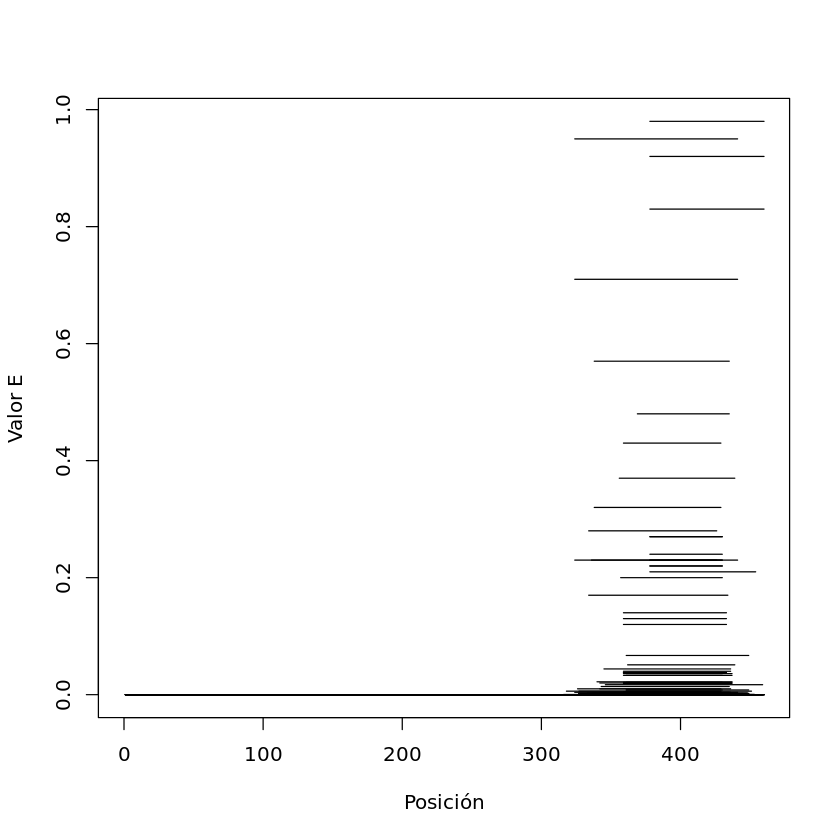

In [9]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, represento
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".

AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

In [ ]:
Por último, lo que haremos será investigar la distribución taxonómica en cada una de las búsquedas en serie que 
hemos hecho con BLASTP. La manera en la que haremos esto será extrayendo, de cada tabla,cuantos alineamientos perte-
necen a cada uno de los taxones generales.

Esto lo haremos teniendo en cuenta la funcion lapply, el objeto Lista_de_Tablas y extrayendo de cada data frame la col-
umna correspondiente al taxón:

In [10]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rodents 
                  1                   1                  13                  12 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  1                   1                   1                   1 
           primates             rodents 
                 15                  19 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   2                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [ ]:
Otra cosa que también podemos hacer es poner un criterio de coincidencia de x aminoácidos en el alineamiento , en
 este caso 300 aminoácidos. Y además, e igual que antes, nos enseñará cuantos alineamientos cumplen
ese requisito y a que taxones pertenecen:

In [11]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 300
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rodents 
                  1                   0                  13                  10 

[[2]]

              birds         bony fishes         crustaceans even-toed ungulates 
                  3                   4                   1                   7 
              flies       frogs & toads               moths           nematodes 
                  0                   1                   1                   0 
           primates             rodents 
                 15                  15 

[[3]]

              birds         bony fishes          carnivores         crustaceans 
                  4                   6                   1                   1 
even-toed ungulates               flies       frogs & toads          gastropods 
    

In [ ]:
## Discusión

En esta tarea he utilizado como query de las busquedas de BLASTP la proteína CHRM1. Esta proteína es un receptor muscarínico de acetilcolina, la cuál Viscardi et al.(2021) afirman que surgió
como resultado de una evolución temprana en el linaje animal, concretamente en el antepasado común entre cnidarios y cordados. Lo que se intenta observar aquí es, mediante una observación de las 
distribuciones taxonómicas de los alineamientos obtenidos, que no haya alineamientos en taxones evolutivamente anteriores al ancestro común de cnidarios y cordados.

Como podemos ver en el BLASTP individual, nuestra proteina query alinea con proteínas de diferentes especies en la base de datos, y ninguna de ellas pertenece a plantas, hongos, ctenoforos, poríferos
o placozoas (taxones evolutivamente anteriores al antepasado cnidarios-cordados). Sin embargo, y dado que el BLASTP individual esta sujeto a un único grado de restricción (Valor E= 1e-50), decidimos
hacer una búsqueda en BLASTP en serie (cada una con un E valor). De  aquí obtuvimos lo siguiente:

1.En los resultados del BLASTP se vió que el número de secuencias homólogas alineadas es mayor cuanto menor era el grado de restricción, es decir con Valores E más  cercanos a 1. Este hecho lo podemos ver
también representado en gráfica,en la cuál tenemos los valores E en el eje x y el número de resultados (secuencias alineadas) en el eje y.
2.También se pudo ver que gran parte de las proteínas subject  presentan varios tipos de homología, una entorno a unos 200 aminoácidos alineados y otra  entorno a 100 aminoácidos. 
Una vez hecho esto pudimos ver, en la gráfica siguiente, que la homología encontrada de 100 aminoácidos se encontraba entre los residuos 350 y 450 de la proteína query; es decir en la zona C-terminal de CHRM1. 
Sin embargo, para la  homología correspondiente a 200 aminoácidos no pudimos ver en que zona de nuestra proteína se correspondía. Como explicación de estas 2 homologías podemos decir que CHRM1 es una proteína
parcialmente conservada, sobretodo en 2 posibles dominios, los cuales seguramente tienen un papel muy importante en la neurotransmisión en receptores muscarínicos.
3.En último lugar, con los resultados del BLASTP en serie, hicimos una búsqueda y observación de la distribución taxonómica de las secuencias que alineaban. Aquí, lo que pudimos observar fue que no hay 
secuencias alineadas anteriores a la divergencia de los cnidarios; es decir, no hay resultados para ctenóforos, poríferos, placozoas, hongos y plantas. Por lo tanto, estos resultados no desmienten la 
afirmación realizada por Viscardi et al. (2021); en la cuál proponen que esta proteína y muchas otras, involucradas en la neurotransmisión, surgieron como resultado de la evolución temprana de los animales.

También es importante resaltar una anomalía detectada, y es que observamos alineamiento con secuencias de virus. Esto pasa con valores  E muy poco restrictivos (cercanos a 1). Sin embargo,  cuando ponemos 
el requisito de 300 aminoácidos alineados, ya no observamos similitud en secuencias virales. Esta anomalía puede ser a que, de forma análoga y/o por azar evolutivo, haya algún gen viral que  presente similitud 
parcial al gen de nuestra proteína (CHRM1).

In [ ]:
## Referencias

-Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind Human Synapse Establishment, Molecular
Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744, doi:10.1093/molbev/msaa252.
-Stephen F. Altschul, Warren Gish, Webb Miller, Eugene W. Myers and David J. Lipman. Basic local alignment search tool, *Journal of Molecular Biology*, Volume 215, Issue 3, 1990, Pages 403-410, 
[doi:10.1016/S0022-2836(05)80360-2](https://doi.org/10.1016/S0022-2836(05)80360-2).

In [ ]:
                                                                          Trabajo realizado por Juan Visier Vélez
                                                                                4º Biotecnología UV-2020/2021